# Bài toán:
- Dự báo sản lượng điện cho 1 khách hàng, trong thời gian 2 năm rưỡi (từ 2022 đến nay)
- Cần độ chính xác cao và hệ số k để điều chỉnh kết quả sau khi dự báo

#### IMPORT CÁC THƯ VIỆN CẦN THIẾT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta, datetime, time
import holidays
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

#### ĐỌC DỮ LIỆU TỪ FILE CSV

Đọc dữ liệu từ file KH.csv, nhưng chỉ lấy dữ liệu năm 2023, 2024, bỏ năm 2022

In [2]:
temp_df = pd.read_csv("KH.csv")
temp_df.head()

,ma_dviqly,ma_khang,IMEI,TIME,BT,CD,TD,SG
0,PP0100,PP01000633003,3.531960e+15,09/01/2022 00:00,2016.6,816.2,290.04,3122.84
1,PP0100,PP01000633003,3.531960e+15,09/01/2022 01:00,2016.6,816.2,290.10,3122.90
2,PP0100,PP01000633003,3.531960e+15,09/01/2022 02:00,2016.6,816.2,290.15,3122.96
3,PP0100,PP01000633003,3.531960e+15,09/01/2022 03:00,2016.6,816.2,290.21,3123.01
4,PP0100,PP01000633003,3.531960e+15,09/01/2022 04:00,2016.6,816.2,290.26,3123.06


In [3]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14956 entries, 0 to 14955
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ma_dviqly  14956 non-null  object 
 1   ma_khang   14956 non-null  object 
 2   IMEI       14956 non-null  float64
 3   TIME       14956 non-null  object 
 4   BT         14956 non-null  float64
 5   CD         14956 non-null  float64
 6   TD         14956 non-null  float64
 7   SG         14956 non-null  float64
dtypes: float64(5), object(3)
memory usage: 934.9+ KB


Đọc dữ liệu từ file 2022.csv để lấy dữ liệu cho năm 2022

In [4]:
df_2022 = pd.read_csv("2022.csv", header=None)
df_2022.rename(columns=dict(zip(df_2022.columns, temp_df.columns)), inplace=True)
df_2022.head()

,ma_dviqly,ma_khang,IMEI,TIME,BT,CD,TD,SG
0,PP0300,PP01000633003,3.531960e+15,01/01/2022 00:00,2002.68,810.58,287.60,3100.87
1,PP0300,PP01000633003,3.531960e+15,01/01/2022 01:00,2002.68,810.58,287.66,3100.93
2,PP0300,PP01000633003,3.531960e+15,01/01/2022 02:00,2002.68,810.58,287.72,3100.99
3,PP0300,PP01000633003,3.531960e+15,01/01/2022 03:00,2002.68,810.58,287.77,3101.05
4,PP0300,PP01000633003,3.531960e+15,01/01/2022 04:00,2002.68,810.58,287.83,3101.11


In [5]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8499 entries, 0 to 8498
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ma_dviqly  8499 non-null   object 
 1   ma_khang   8499 non-null   object 
 2   IMEI       8499 non-null   float64
 3   TIME       8499 non-null   object 
 4   BT         8499 non-null   float64
 5   CD         8499 non-null   float64
 6   TD         8499 non-null   float64
 7   SG         8499 non-null   float64
dtypes: float64(5), object(3)
memory usage: 531.3+ KB


Lấy dữ liệu năm 2023, 2034 cho temp_df

In [6]:
temp_df['TIME'] = pd.to_datetime(temp_df['TIME'], format='%d/%m/%Y %H:%M')
temp_df['Year'] = temp_df['TIME'].dt.year
temp_df = temp_df[temp_df["Year"] != 2022]
temp_df.head()

,ma_dviqly,ma_khang,IMEI,TIME,BT,CD,TD,SG,Year
4018,PP0100,PP01000633003,3.531960e+15,2023-01-01 00:00:00,2922.84,1170.45,414.95,4508.25,2023
4019,PP0100,PP01000633003,3.531960e+15,2023-01-01 01:00:00,2922.84,1170.45,414.99,4508.29,2023
4020,PP0100,PP01000633003,3.531960e+15,2023-01-01 02:00:00,2922.84,1170.45,415.03,4508.34,2023
4021,PP0100,PP01000633003,3.531960e+15,2023-01-01 03:00:00,2922.84,1170.45,415.08,4508.38,2023
4022,PP0100,PP01000633003,3.531960e+15,2023-01-01 04:00:00,2922.84,1170.45,415.12,4508.42,2023


In [7]:
temp_df.drop(labels=['Year'], axis='columns', inplace=True)
temp_df.head()

,ma_dviqly,ma_khang,IMEI,TIME,BT,CD,TD,SG
4018,PP0100,PP01000633003,3.531960e+15,2023-01-01 00:00:00,2922.84,1170.45,414.95,4508.25
4019,PP0100,PP01000633003,3.531960e+15,2023-01-01 01:00:00,2922.84,1170.45,414.99,4508.29
4020,PP0100,PP01000633003,3.531960e+15,2023-01-01 02:00:00,2922.84,1170.45,415.03,4508.34
4021,PP0100,PP01000633003,3.531960e+15,2023-01-01 03:00:00,2922.84,1170.45,415.08,4508.38
4022,PP0100,PP01000633003,3.531960e+15,2023-01-01 04:00:00,2922.84,1170.45,415.12,4508.42


Gộp temp_df và df_2022 lại thành df_full

In [8]:
df_full = pd.concat([df_2022, temp_df])

#### KHẢO SÁT SƠ BỘ DỮ LIỆU

In [9]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19437 entries, 0 to 14955
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ma_dviqly  19437 non-null  object 
 1   ma_khang   19437 non-null  object 
 2   IMEI       19437 non-null  float64
 3   TIME       19437 non-null  object 
 4   BT         19437 non-null  float64
 5   CD         19437 non-null  float64
 6   TD         19437 non-null  float64
 7   SG         19437 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.3+ MB


In [10]:
df_full['ma_dviqly'].unique()

array(['PP0300', 'PP0100'], dtype=object)

In [11]:
df_full['ma_khang'].unique()

array(['PP01000633003'], dtype=object)

In [12]:
df_full['IMEI'].unique()

array([3.53196e+15])

In [13]:
def check_sum(bt, cd, td, sg):
    return sg - (bt + cd + td)

In [14]:
df_full['check_sum'] = np.vectorize(check_sum)(df_full['BT'], df_full['CD'], df_full['TD'], df_full['SG'])
df_full.head()

,ma_dviqly,ma_khang,IMEI,TIME,BT,CD,TD,SG,check_sum
0,PP0300,PP01000633003,3.531960e+15,01/01/2022 00:00,2002.68,810.58,287.60,3100.87,0.01
1,PP0300,PP01000633003,3.531960e+15,01/01/2022 01:00,2002.68,810.58,287.66,3100.93,0.01
2,PP0300,PP01000633003,3.531960e+15,01/01/2022 02:00,2002.68,810.58,287.72,3100.99,0.01
3,PP0300,PP01000633003,3.531960e+15,01/01/2022 03:00,2002.68,810.58,287.77,3101.05,0.02
4,PP0300,PP01000633003,3.531960e+15,01/01/2022 04:00,2002.68,810.58,287.83,3101.11,0.02


In [15]:
df_full[df_full['check_sum'] !=0]

,ma_dviqly,ma_khang,IMEI,TIME,BT,CD,TD,SG,check_sum
0,PP0300,PP01000633003,3.531960e+15,01/01/2022 00:00,2002.68,810.58,287.60,3100.87,1.000000e-02
1,PP0300,PP01000633003,3.531960e+15,01/01/2022 01:00,2002.68,810.58,287.66,3100.93,1.000000e-02
2,PP0300,PP01000633003,3.531960e+15,01/01/2022 02:00,2002.68,810.58,287.72,3100.99,1.000000e-02
3,PP0300,PP01000633003,3.531960e+15,01/01/2022 03:00,2002.68,810.58,287.77,3101.05,2.000000e-02
4,PP0300,PP01000633003,3.531960e+15,01/01/2022 04:00,2002.68,810.58,287.83,3101.11,2.000000e-02
...,...,...,...,...,...,...,...,...,...
14951,PP0100,PP01000633003,3.531960e+15,2024-07-08 19:00:00,987.20,388.60,135.41,1511.21,-2.273737e-13
14952,PP0100,PP01000633003,3.531960e+15,2024-07-08 20:00:00,987.20,388.72,135.41,1511.33,-2.273737e-13
14953,PP0100,PP01000633003,3.531960e+15,2024-07-08 21:00:00,987.29,388.72,135.41,1511.43,1.000000e-02
14954,PP0100,PP01000633003,3.531960e+15,2024-07-08 22:00:00,987.38,388.72,135.41,1511.52,1.000000e-02


##### Nhận xét
- 2 cột ma_khang, IMEI Chỉ có dữ liệu cho 1 khách hàng -> chính xác
- cột ma_dviqly lại có 2 giá trị -> có sự thay đổi trong dữ liệu, ko qtrong
- Dữ liệu cột TIME đang ở dạng ngày tháng năm giờ -> cần xử lý thêm để phù hợp với bài toán dự đoán theo tháng
- 3 cột BT, CD, TD là chỉ số của công tơ 3 pha, cột SG là tổng của 3 cột này, nhưng vì trong quá trình cộng chưa rõ vì sao mà có sai số (cột check_sum) nên sẽ xử lí cộng lại 3 cột

#### KHẢO SÁT TÍNH LIÊN TỤC VỀ THỜI GIAN CỦA DỮ LIỆU

Chuyển cột TIME về dạng datetime

In [16]:
df_full['TIME'] = pd.to_datetime(df_full['TIME'], format='%d/%m/%Y %H:%M')

Ngày bắt đầu

In [17]:
start_date = df_full['TIME'].min().date()
print(start_date)

2022-01-01


Ngày cuối cùng

In [18]:
end_date = df_full['TIME'].max().date()
print(end_date)

2024-07-08


Khoảng cách

In [19]:
date_diff = end_date - start_date 
date_diff

datetime.timedelta(days=919)

=> Số lượng ngày cần có: 920

Tạo một cột chỉ chứa thông tin ngày tháng năm

In [20]:
df_full['date'] =  df_full['TIME'].dt.date

In [21]:
df_full.head()

,ma_dviqly,ma_khang,IMEI,TIME,BT,CD,TD,SG,check_sum,date
0,PP0300,PP01000633003,3.531960e+15,2022-01-01 00:00:00,2002.68,810.58,287.60,3100.87,0.01,2022-01-01
1,PP0300,PP01000633003,3.531960e+15,2022-01-01 01:00:00,2002.68,810.58,287.66,3100.93,0.01,2022-01-01
2,PP0300,PP01000633003,3.531960e+15,2022-01-01 02:00:00,2002.68,810.58,287.72,3100.99,0.01,2022-01-01
3,PP0300,PP01000633003,3.531960e+15,2022-01-01 03:00:00,2002.68,810.58,287.77,3101.05,0.02,2022-01-01
4,PP0300,PP01000633003,3.531960e+15,2022-01-01 04:00:00,2002.68,810.58,287.83,3101.11,0.02,2022-01-01


Số ngày có trong dữ liệu

In [22]:
len(df_full['date'].unique())

901

##### Nhận xét
- Dữ liệu bị thiếu không nhiều: chỉ 901/920 ngày

#### XỬ LÝ THÊM CỘT TỔNG SẢN LƯỢNG

In [23]:
df_full['total_usage'] = df_full['BT'] + df_full['CD'] + df_full['TD']
df_full.head()

,ma_dviqly,ma_khang,IMEI,TIME,BT,CD,TD,SG,check_sum,date,total_usage
0,PP0300,PP01000633003,3.531960e+15,2022-01-01 00:00:00,2002.68,810.58,287.60,3100.87,0.01,2022-01-01,3100.86
1,PP0300,PP01000633003,3.531960e+15,2022-01-01 01:00:00,2002.68,810.58,287.66,3100.93,0.01,2022-01-01,3100.92
2,PP0300,PP01000633003,3.531960e+15,2022-01-01 02:00:00,2002.68,810.58,287.72,3100.99,0.01,2022-01-01,3100.98
3,PP0300,PP01000633003,3.531960e+15,2022-01-01 03:00:00,2002.68,810.58,287.77,3101.05,0.02,2022-01-01,3101.03
4,PP0300,PP01000633003,3.531960e+15,2022-01-01 04:00:00,2002.68,810.58,287.83,3101.11,0.02,2022-01-01,3101.09


Kiểm tra lại sai số

In [24]:
df_full['check_sum2'] = np.vectorize(check_sum)(df_full['BT'], df_full['CD'], df_full['TD'], df_full['total_usage'])
df_full.head()

,ma_dviqly,ma_khang,IMEI,TIME,BT,CD,TD,SG,check_sum,date,total_usage,check_sum2
0,PP0300,PP01000633003,3.531960e+15,2022-01-01 00:00:00,2002.68,810.58,287.60,3100.87,0.01,2022-01-01,3100.86,0.0
1,PP0300,PP01000633003,3.531960e+15,2022-01-01 01:00:00,2002.68,810.58,287.66,3100.93,0.01,2022-01-01,3100.92,0.0
2,PP0300,PP01000633003,3.531960e+15,2022-01-01 02:00:00,2002.68,810.58,287.72,3100.99,0.01,2022-01-01,3100.98,0.0
3,PP0300,PP01000633003,3.531960e+15,2022-01-01 03:00:00,2002.68,810.58,287.77,3101.05,0.02,2022-01-01,3101.03,0.0
4,PP0300,PP01000633003,3.531960e+15,2022-01-01 04:00:00,2002.68,810.58,287.83,3101.11,0.02,2022-01-01,3101.09,0.0


In [25]:
df_full[df_full['check_sum2'] !=0]

,ma_dviqly,ma_khang,IMEI,TIME,BT,CD,TD,SG,check_sum,date,total_usage,check_sum2


##### Nhận xét
- Không có sai số, đã xử lý xong


#### XỬ LÝ DỮ LIỆU THEO GIỜ THÀNH THEO NGÀY
- Cách xử lý: group by theo ngày rồi lấy cột max - min cột tổng sản lượng
    - Vấn đề: sẽ có những ngày chỉ lấy được dữ liệu lúc 0h -> sản lượng là 0
    - Cách giải quyết: với những ngày như vậy, tìm hiệu sản lượng lúc 0h sáng hôm sau và 0h sáng ngày đó
- ~~Cách xử lý: lấy sản lượng ở 0h ngày hôm sau trừ cho sản lượng ở 0h ngày hiện tại~~
    - Vấn đề: có nhiều ngày ko có dữ liệu lúc 0h hoặc 23h -> gây ra khó khăn khi tính toán

In [26]:
def get_total(arr):
    return arr.max() - arr.min()


In [27]:
total_usage_df = df_full[['date', 'total_usage']].groupby(['date']).agg(get_total).reset_index()
total_usage_df.head()

,date,total_usage
0,2022-01-01,1.36
1,2022-01-02,1.07
2,2022-01-03,1.33
3,2022-01-04,3.67
4,2022-01-05,3.81


In [28]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19437 entries, 0 to 14955
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ma_dviqly    19437 non-null  object        
 1   ma_khang     19437 non-null  object        
 2   IMEI         19437 non-null  float64       
 3   TIME         19437 non-null  datetime64[ns]
 4   BT           19437 non-null  float64       
 5   CD           19437 non-null  float64       
 6   TD           19437 non-null  float64       
 7   SG           19437 non-null  float64       
 8   check_sum    19437 non-null  float64       
 9   date         19437 non-null  object        
 10  total_usage  19437 non-null  float64       
 11  check_sum2   19437 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(3)
memory usage: 1.9+ MB


Kiểm tra total_usage_df có giá trị rỗng không

In [29]:
total_usage_df[total_usage_df['total_usage'].isnull()==True]

,date,total_usage


In [30]:
total_usage_df[total_usage_df['total_usage'].isna()==True]

,date,total_usage


In [31]:
total_usage_df['date'] = pd.to_datetime(total_usage_df['date'])

In [32]:
total_usage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         901 non-null    datetime64[ns]
 1   total_usage  901 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.2 KB


##### Nhận xét
- Dữ liệu không có null hay na

 #### TẠO TIME SERIES LIÊN TỤC VỀ THỜI GIAN

Tạo dataframe liên tục từ ngày bắt đầu đến ngày kết thúc

In [33]:
date_range = pd.date_range(start=start_date, end=end_date)
date_range

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10',
               ...
               '2024-06-29', '2024-06-30', '2024-07-01', '2024-07-02',
               '2024-07-03', '2024-07-04', '2024-07-05', '2024-07-06',
               '2024-07-07', '2024-07-08'],
              dtype='datetime64[ns]', length=920, freq='D')

In [34]:
date_df = pd.DataFrame(date_range, columns=['date'])
date_df.head()

,date
0,2022-01-01
1,2022-01-02
2,2022-01-03
3,2022-01-04
4,2022-01-05


In [35]:
date_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    920 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.3 KB


In [36]:
total_usage_df = date_df.merge(right=total_usage_df, how='left', on="date")

In [37]:
total_usage_df.head()

,date,total_usage
0,2022-01-01,1.36
1,2022-01-02,1.07
2,2022-01-03,1.33
3,2022-01-04,3.67
4,2022-01-05,3.81


In [38]:
total_usage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         920 non-null    datetime64[ns]
 1   total_usage  901 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.5 KB


<Axes: ylabel='total_usage'>

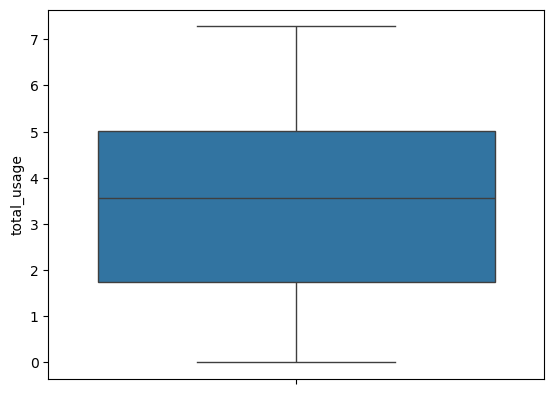

In [39]:
sns.boxplot(data=total_usage_df, y = 'total_usage')

##### Nhận xét:
- Đã đúng yêu cầu, gồm 920 ngày và 901 ngày có sản lượng, nhưng có những ngày có sản lượng bằng 0, cần phải xử lí

#### TẠO DỮ LIỆU NGÀY LỄ

In [40]:
vietnam_holidays = holidays.Vietnam(years=[2022, 2023, 2024])

# Lấy danh sách các ngày lễ
holiday_list = list(vietnam_holidays.items())
holiday_df = pd.DataFrame(holiday_list, columns=["datetime", 'Holiday Name'])
holiday_df['datetime'] = pd.to_datetime(holiday_df['datetime'])
holiday_df['year'] = holiday_df['datetime'].dt.year
holiday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      41 non-null     datetime64[ns]
 1   Holiday Name  41 non-null     object        
 2   year          41 non-null     int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 952.0+ bytes


In [41]:
holiday_df['year'].unique()

array([2024, 2022, 2023])

In [42]:
def isHoliday(date, holiday_df):
    return date in holiday_df['datetime'].values

In [43]:
total_usage_df['is_holiday'] = np.vectorize(isHoliday, excluded=['holiday_df'])(total_usage_df['date'], holiday_df=holiday_df)

In [44]:
total_usage_df[total_usage_df['is_holiday'] == True].info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 0 to 851
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         40 non-null     datetime64[ns]
 1   total_usage  40 non-null     float64       
 2   is_holiday   40 non-null     bool          
dtypes: bool(1), datetime64[ns](1), float64(1)
memory usage: 1000.0 bytes


##### Nhận xét
- Dữ liệu ngày lễ đã đủ, do năm 2024 chưa có ngày 2/9 nên chỉ có 40 dòng

#### TẠO DỮ LIỆU NHIỆT ĐỘ

In [45]:
temp_start_date = start_date.strftime('%Y-%m-%d')
temp_end_date = (end_date + timedelta(days=1)).strftime('%Y-%m-%d')

In [46]:
temp_start_date

'2022-01-01'

In [47]:
temp_end_date

'2024-07-09'

In [48]:
lat = 16.047079
lon = 108.206230

In [49]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": lat,
	"longitude": lon,
	"start_date": temp_start_date,
	"end_date": temp_end_date,
	"daily": "temperature_2m_mean",
	"timezone": "Asia/Bangkok"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process daily data. The order of variables needs to be the same as requested.
daily = response.Daily()
daily_temperature_2m_mean = daily.Variables(0).ValuesAsNumpy()

daily_data = {"date": pd.date_range(
	start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
	end = pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = daily.Interval()),
	inclusive = "left"
)}
daily_data["temperature"] = daily_temperature_2m_mean

daily_dataframe = pd.DataFrame(data = daily_data)
print(daily_dataframe)



Coordinates 16.063268661499023°N 108.23863983154297°E
Elevation 7.0 m asl
Timezone b'Asia/Bangkok' b'+07'
Timezone difference to GMT+0 25200 s
                         date  temperature
0   2021-12-31 17:00:00+00:00    22.066584
1   2022-01-01 17:00:00+00:00    21.893663
2   2022-01-02 17:00:00+00:00    21.964500
3   2022-01-03 17:00:00+00:00    21.991585
4   2022-01-04 17:00:00+00:00    22.566584
..                        ...          ...
916 2024-07-04 17:00:00+00:00    29.187416
917 2024-07-05 17:00:00+00:00    29.354088
918 2024-07-06 17:00:00+00:00    29.331167
919 2024-07-07 17:00:00+00:00    28.595747
920 2024-07-08 17:00:00+00:00    29.487417

[921 rows x 2 columns]


In [50]:
daily_dataframe['temperature'] = daily_dataframe['temperature'].apply(lambda x: np.round(x, 2))
daily_dataframe.head()

,date,temperature
0,2021-12-31 17:00:00+00:00,22.07
1,2022-01-01 17:00:00+00:00,21.89
2,2022-01-02 17:00:00+00:00,21.96
3,2022-01-03 17:00:00+00:00,21.99
4,2022-01-04 17:00:00+00:00,22.57


In [51]:
daily_dataframe['date'] = daily_dataframe['date'].dt.date
daily_dataframe['date'] = pd.to_datetime(daily_dataframe['date'])
daily_dataframe.tail()

,date,temperature
916,2024-07-04,29.19
917,2024-07-05,29.35
918,2024-07-06,29.33
919,2024-07-07,28.60
920,2024-07-08,29.49


In [52]:
daily_dataframe.tail()

,date,temperature
916,2024-07-04,29.19
917,2024-07-05,29.35
918,2024-07-06,29.33
919,2024-07-07,28.60
920,2024-07-08,29.49


In [53]:
total_usage_df = pd.merge(total_usage_df, daily_dataframe[['date', 'temperature']], on='date', how='left')

In [54]:
total_usage_df.head()

,date,total_usage,is_holiday,temperature
0,2022-01-01,1.36,True,21.89
1,2022-01-02,1.07,False,21.96
2,2022-01-03,1.33,True,21.99
3,2022-01-04,3.67,False,22.57
4,2022-01-05,3.81,False,22.97


In [55]:
total_usage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         920 non-null    datetime64[ns]
 1   total_usage  901 non-null    float64       
 2   is_holiday   920 non-null    bool          
 3   temperature  920 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(2)
memory usage: 22.6 KB


##### Nhận xét
- Không có giá trị null cột nhiệt độ

#### TẠO DỮ LIỆU THỨ TRONG TUẦN

In [56]:
total_usage_df['weekday'] = total_usage_df['date'].dt.day_of_week

In [57]:
total_usage_df.head()

,date,total_usage,is_holiday,temperature,weekday
0,2022-01-01,1.36,True,21.89,5
1,2022-01-02,1.07,False,21.96,6
2,2022-01-03,1.33,True,21.99,0
3,2022-01-04,3.67,False,22.57,1
4,2022-01-05,3.81,False,22.97,2


#### KHẢO SÁT DỮ LIỆU 0

Chuẩn bị temp_dataset:
- chuyển cột time về datetime
- thêm cột date chỉ chứa date, không chứa time
- thêm cột time chỉ chứa time, không chứa date
- tạo cột sg_2 = tổng 3 cột bt, cd, td

In [58]:
temp_df.head()

,ma_dviqly,ma_khang,IMEI,TIME,BT,CD,TD,SG
4018,PP0100,PP01000633003,3.531960e+15,2023-01-01 00:00:00,2922.84,1170.45,414.95,4508.25
4019,PP0100,PP01000633003,3.531960e+15,2023-01-01 01:00:00,2922.84,1170.45,414.99,4508.29
4020,PP0100,PP01000633003,3.531960e+15,2023-01-01 02:00:00,2922.84,1170.45,415.03,4508.34
4021,PP0100,PP01000633003,3.531960e+15,2023-01-01 03:00:00,2922.84,1170.45,415.08,4508.38
4022,PP0100,PP01000633003,3.531960e+15,2023-01-01 04:00:00,2922.84,1170.45,415.12,4508.42


In [59]:
temp_df['date'] = pd.to_datetime(temp_df["TIME"].dt.date)


In [60]:
temp_df['time_only'] = temp_df['TIME'].dt.time

In [61]:
temp_df["SG_2"] = temp_df["BT"] + temp_df["CD"] + temp_df["TD"]

In [62]:
temp_df.head()

,ma_dviqly,ma_khang,IMEI,TIME,BT,CD,TD,SG,date,time_only,SG_2
4018,PP0100,PP01000633003,3.531960e+15,2023-01-01 00:00:00,2922.84,1170.45,414.95,4508.25,2023-01-01,00:00:00,4508.24
4019,PP0100,PP01000633003,3.531960e+15,2023-01-01 01:00:00,2922.84,1170.45,414.99,4508.29,2023-01-01,01:00:00,4508.28
4020,PP0100,PP01000633003,3.531960e+15,2023-01-01 02:00:00,2922.84,1170.45,415.03,4508.34,2023-01-01,02:00:00,4508.32
4021,PP0100,PP01000633003,3.531960e+15,2023-01-01 03:00:00,2922.84,1170.45,415.08,4508.38,2023-01-01,03:00:00,4508.37
4022,PP0100,PP01000633003,3.531960e+15,2023-01-01 04:00:00,2922.84,1170.45,415.12,4508.42,2023-01-01,04:00:00,4508.41


In [63]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10938 entries, 4018 to 14955
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ma_dviqly  10938 non-null  object        
 1   ma_khang   10938 non-null  object        
 2   IMEI       10938 non-null  float64       
 3   TIME       10938 non-null  datetime64[ns]
 4   BT         10938 non-null  float64       
 5   CD         10938 non-null  float64       
 6   TD         10938 non-null  float64       
 7   SG         10938 non-null  float64       
 8   date       10938 non-null  datetime64[ns]
 9   time_only  10938 non-null  object        
 10  SG_2       10938 non-null  float64       
dtypes: datetime64[ns](2), float64(6), object(3)
memory usage: 1.0+ MB


Tạo DataFrame chứa date những ngày có tổng sản lượng bằng 0

In [64]:
df_date_0 = pd.DataFrame(total_usage_df[total_usage_df['total_usage'] == 0]['date'])
df_date_0.head()

,date
606,2023-08-30
609,2023-09-02
612,2023-09-05
615,2023-09-08
618,2023-09-11


In [65]:
df_date_0['date'] = pd.to_datetime(df_date_0['date'])

In [66]:
df_date_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 606 to 647
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    14 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 224.0 bytes


Xem thử những ngày có sản lượng bằng 0 do đâu

In [67]:
temp_df.merge(right=df_date_0, how="inner", on="date")

,ma_dviqly,ma_khang,IMEI,TIME,BT,CD,TD,SG,date,time_only,SG_2
0,PP0100,PP01000633003,3.531960e+15,2023-08-30,205.47,81.24,22.40,309.12,2023-08-30,00:00:00,309.11
1,PP0100,PP01000633003,3.531960e+15,2023-09-02,214.28,84.78,23.54,322.62,2023-09-02,00:00:00,322.60
2,PP0100,PP01000633003,3.531960e+15,2023-09-05,218.04,85.80,24.54,328.39,2023-09-05,00:00:00,328.38
3,PP0100,PP01000633003,3.531960e+15,2023-09-08,229.58,90.45,25.68,345.73,2023-09-08,00:00:00,345.71
4,PP0100,PP01000633003,3.531960e+15,2023-09-11,235.75,92.71,26.67,355.14,2023-09-11,00:00:00,355.13
5,PP0100,PP01000633003,3.531960e+15,2023-09-14,248.07,97.91,27.79,373.77,2023-09-14,00:00:00,373.77
6,PP0100,PP01000633003,3.531960e+15,2023-09-19,260.86,102.87,29.42,393.16,2023-09-19,00:00:00,393.15
7,PP0100,PP01000633003,3.531960e+15,2023-09-22,272.51,107.56,30.43,410.51,2023-09-22,00:00:00,410.50
8,PP0100,PP01000633003,3.531960e+15,2023-09-25,278.52,109.67,31.39,419.59,2023-09-25,00:00:00,419.58
9,PP0100,PP01000633003,3.531960e+15,2023-09-28,288.32,113.66,32.41,434.40,2023-09-28,00:00:00,434.39


##### Nhận xét
- Những ngày có sản lượng bằng 0 do dữ liệu chỉ có vào lúc 0h, 1 dòng dữ liệu duy nhất
    -  Sản lượng phải được tính bằng hiệu 0h sáng hôm sau và 0h sáng hôm nay

Tính sản lượng min ngày sau

In [68]:
def get_min_after(date, temp_df):
    date_after = date + pd.Timedelta(days=1)
    filtered_df = temp_df[temp_df['date'] == date_after]
    if not filtered_df.empty:
        return filtered_df.iloc[0, -1]
    else:
        return None  # or any default value you prefer

In [69]:
test_date = datetime(2023, 8, 30)
get_min_after(test_date, temp_df=temp_df)

314.64

In [70]:
df_date_0['min_after'] = df_date_0['date'].apply(lambda date: get_min_after(date, temp_df))
df_date_0

,date,min_after
606,2023-08-30,314.64
609,2023-09-02,324.24
612,2023-09-05,334.16
615,2023-09-08,351.44
618,2023-09-11,361.45
621,2023-09-14,NaN
626,2023-09-19,398.81
629,2023-09-22,416.06
632,2023-09-25,423.87
635,2023-09-28,439.20


In [71]:
df_date_0 = df_date_0.merge(right=temp_df, how='left', on='date')

In [72]:
df_date_0['diff'] = df_date_0['min_after'] - df_date_0['SG_2']

In [73]:
df_date_0

,date,min_after,ma_dviqly,ma_khang,IMEI,TIME,BT,CD,TD,SG,time_only,SG_2,diff
0,2023-08-30,314.64,PP0100,PP01000633003,3.531960e+15,2023-08-30,205.47,81.24,22.40,309.12,00:00:00,309.11,5.53
1,2023-09-02,324.24,PP0100,PP01000633003,3.531960e+15,2023-09-02,214.28,84.78,23.54,322.62,00:00:00,322.60,1.64
2,2023-09-05,334.16,PP0100,PP01000633003,3.531960e+15,2023-09-05,218.04,85.80,24.54,328.39,00:00:00,328.38,5.78
3,2023-09-08,351.44,PP0100,PP01000633003,3.531960e+15,2023-09-08,229.58,90.45,25.68,345.73,00:00:00,345.71,5.73
4,2023-09-11,361.45,PP0100,PP01000633003,3.531960e+15,2023-09-11,235.75,92.71,26.67,355.14,00:00:00,355.13,6.32
5,2023-09-14,NaN,PP0100,PP01000633003,3.531960e+15,2023-09-14,248.07,97.91,27.79,373.77,00:00:00,373.77,NaN
6,2023-09-19,398.81,PP0100,PP01000633003,3.531960e+15,2023-09-19,260.86,102.87,29.42,393.16,00:00:00,393.15,5.66
7,2023-09-22,416.06,PP0100,PP01000633003,3.531960e+15,2023-09-22,272.51,107.56,30.43,410.51,00:00:00,410.50,5.56
8,2023-09-25,423.87,PP0100,PP01000633003,3.531960e+15,2023-09-25,278.52,109.67,31.39,419.59,00:00:00,419.58,4.29
9,2023-09-28,439.20,PP0100,PP01000633003,3.531960e+15,2023-09-28,288.32,113.66,32.41,434.40,00:00:00,434.39,4.81


Cập nhật giá trị 0 của sản lượng bằng diff của df_date_0

In [74]:
def fill_usage(row):
    if row['total_usage'] != 0:
        return row['total_usage']
    diff_value = df_date_0[df_date_0['date'] == row['date']]['diff']
    return diff_value.values[0] if not diff_value.empty else np.nan

In [75]:
total_usage_df['fill_zeros_usage'] = total_usage_df.apply(fill_usage, axis=1)

<Axes: ylabel='fill_zeros_usage'>

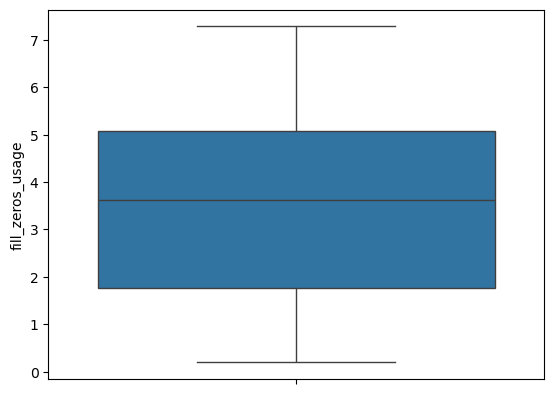

In [76]:
sns.boxplot(data=total_usage_df, y='fill_zeros_usage')

In [77]:
total_usage_df.merge(df_date_0, how='inner', on="date")

,date,total_usage,is_holiday,temperature,weekday,fill_zeros_usage,min_after,ma_dviqly,ma_khang,IMEI,TIME,BT,CD,TD,SG,time_only,SG_2,diff
0,2023-08-30,0.0,False,27.03,2,5.53,314.64,PP0100,PP01000633003,3.531960e+15,2023-08-30,205.47,81.24,22.40,309.12,00:00:00,309.11,5.53
1,2023-09-02,0.0,True,30.13,5,1.64,324.24,PP0100,PP01000633003,3.531960e+15,2023-09-02,214.28,84.78,23.54,322.62,00:00:00,322.60,1.64
2,2023-09-05,0.0,False,27.99,1,5.78,334.16,PP0100,PP01000633003,3.531960e+15,2023-09-05,218.04,85.80,24.54,328.39,00:00:00,328.38,5.78
3,2023-09-08,0.0,False,28.18,4,5.73,351.44,PP0100,PP01000633003,3.531960e+15,2023-09-08,229.58,90.45,25.68,345.73,00:00:00,345.71,5.73
4,2023-09-11,0.0,False,29.24,0,6.32,361.45,PP0100,PP01000633003,3.531960e+15,2023-09-11,235.75,92.71,26.67,355.14,00:00:00,355.13,6.32
5,2023-09-14,0.0,False,26.97,3,NaN,NaN,PP0100,PP01000633003,3.531960e+15,2023-09-14,248.07,97.91,27.79,373.77,00:00:00,373.77,NaN
6,2023-09-19,0.0,False,28.70,1,5.66,398.81,PP0100,PP01000633003,3.531960e+15,2023-09-19,260.86,102.87,29.42,393.16,00:00:00,393.15,5.66
7,2023-09-22,0.0,False,28.66,4,5.56,416.06,PP0100,PP01000633003,3.531960e+15,2023-09-22,272.51,107.56,30.43,410.51,00:00:00,410.50,5.56
8,2023-09-25,0.0,False,27.68,0,4.29,423.87,PP0100,PP01000633003,3.531960e+15,2023-09-25,278.52,109.67,31.39,419.59,00:00:00,419.58,4.29
9,2023-09-28,0.0,False,27.64,3,4.81,439.20,PP0100,PP01000633003,3.531960e+15,2023-09-28,288.32,113.66,32.41,434.40,00:00:00,434.39,4.81


In [78]:
total_usage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              920 non-null    datetime64[ns]
 1   total_usage       901 non-null    float64       
 2   is_holiday        920 non-null    bool          
 3   temperature       920 non-null    float64       
 4   weekday           920 non-null    int32         
 5   fill_zeros_usage  899 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(3), int32(1)
memory usage: 33.4 KB


In [79]:
pd.DataFrame(total_usage_df[total_usage_df['fill_zeros_usage'] == 0]['date'])

,date


##### Nhận xét
- Fill hết dữ liệu 0, không làm thay đổi phân bố dữ liệu
- Thêm 2 giá trị Nan (do không có giá trị của ngày hôm sau), sẽ xử lý sau

#### KHẢO SÁT DỮ LIỆU TRỐNG

In [80]:
null_total_usage_df = total_usage_df[total_usage_df['fill_zeros_usage'].isnull()]
null_total_usage_df.head()

,date,total_usage,is_holiday,temperature,weekday,fill_zeros_usage
16,2022-01-17,NaN,False,21.57,0,NaN
494,2023-05-10,NaN,False,27.34,2,NaN
495,2023-05-11,NaN,False,27.11,3,NaN
583,2023-08-07,NaN,False,31.88,0,NaN
584,2023-08-08,NaN,False,32.03,1,NaN


In [81]:
null_total_usage_df[null_total_usage_df['is_holiday'] == True] 

,date,total_usage,is_holiday,temperature,weekday,fill_zeros_usage


Không có ngày nào bị thiếu là ngày lễ

In [82]:
null_total_usage_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 16 to 665
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              21 non-null     datetime64[ns]
 1   total_usage       2 non-null      float64       
 2   is_holiday        21 non-null     bool          
 3   temperature       21 non-null     float64       
 4   weekday           21 non-null     int32         
 5   fill_zeros_usage  0 non-null      float64       
dtypes: bool(1), datetime64[ns](1), float64(3), int32(1)
memory usage: 945.0 bytes


In [83]:
null_total_usage_df.loc[:,'year'] = null_total_usage_df['date'].dt.year
null_total_usage_df.loc[:, 'month'] = null_total_usage_df['date'].dt.month

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12672\1127018365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_total_usage_df.loc[:,'year'] = null_total_usage_df['date'].dt.year
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12672\1127018365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_total_usage_df.loc[:, 'month'] = null_total_usage_df['date'].dt.month


<Axes: xlabel='month', ylabel='count'>

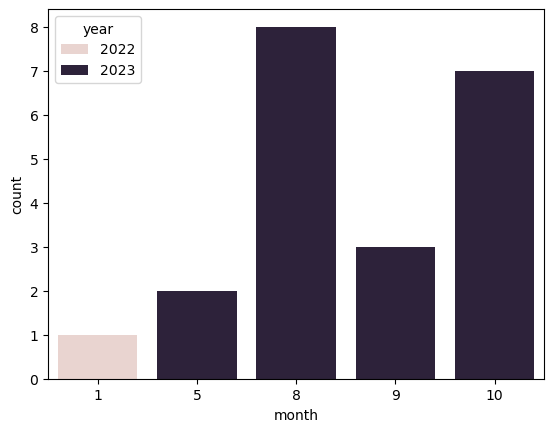

In [84]:
sns.countplot(data= null_total_usage_df, x = 'month', hue='year')

##### Nhận xét
- Dữ liệu trống ít, có thể xử lý bằng lấy giá trị của thứ đó tuần trước: ví dụ bị thiếu dữ liệu vào ngày thứ 5 thì sẽ lấy dữ liệu của ngày thứ 5 tuần trước để fill vào.

#### XỬ LÝ DỮ LIỆU TRỐNG BẰNG CÁCH TÍNH GIÁ TRỊ CỦA THỨ ĐÓ VÀO TUẦN TRƯỚC

In [85]:
def get_pre_7(total_usage_df,date, pre_7_date):
    pre_7_usage = np.round(total_usage_df.loc[total_usage_df['date'] == pre_7_date]['fill_zeros_usage'].sum(), decimals=2)
    total_usage_df.loc[total_usage_df['date'] == date, 'fill_zeros_usage'] = pre_7_usage
    return pre_7_usage

In [86]:
date = datetime(2022, 1 , 26)
pre_7 = date - timedelta(days=7)
get_pre_7(total_usage_df=total_usage_df, date=date, pre_7_date = pre_7)

2.97

In [87]:
np.round(total_usage_df.loc[total_usage_df['date'] == pre_7]['fill_zeros_usage'].sum(), decimals=2)

2.97

In [88]:
total_usage_df['new_total_usage'] = total_usage_df.apply(
    lambda row: row['fill_zeros_usage'] if not pd.isna(row['fill_zeros_usage']) else get_pre_7(
        total_usage_df=total_usage_df, 
        date = row['date'],
        pre_7_date=row['date'] - timedelta(days=7)
    ), 
    axis='columns'
)

In [89]:
nan_rows = total_usage_df[total_usage_df['new_total_usage'].isnull()]
nan_rows

,date,total_usage,is_holiday,temperature,weekday,fill_zeros_usage,new_total_usage


In [90]:
total_usage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              920 non-null    datetime64[ns]
 1   total_usage       901 non-null    float64       
 2   is_holiday        920 non-null    bool          
 3   temperature       920 non-null    float64       
 4   weekday           920 non-null    int32         
 5   fill_zeros_usage  920 non-null    float64       
 6   new_total_usage   920 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(4), int32(1)
memory usage: 40.6 KB


#### KHẢO SÁT BIẾN MỤC TIÊU

<Axes: ylabel='new_total_usage'>

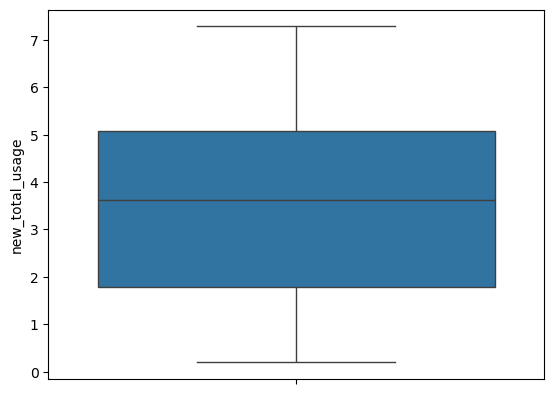

In [91]:
sns.boxplot(data=total_usage_df, y ='new_total_usage')

In [92]:
total_usage_df[total_usage_df['new_total_usage'] == 0]

,date,total_usage,is_holiday,temperature,weekday,fill_zeros_usage,new_total_usage


In [93]:
total_usage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              920 non-null    datetime64[ns]
 1   total_usage       901 non-null    float64       
 2   is_holiday        920 non-null    bool          
 3   temperature       920 non-null    float64       
 4   weekday           920 non-null    int32         
 5   fill_zeros_usage  920 non-null    float64       
 6   new_total_usage   920 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(4), int32(1)
memory usage: 40.6 KB


##### Nhận xét
- Đã xử lí xong dữ liệu 0 và dữ liệu null
- Mean của dữ liệu bị thay đổi nhẹ

#### NHÂN SẢN LƯỢNG VỚI HỆ SỐ = 1100

In [94]:
total_usage_df['new_total_usage'] = total_usage_df['new_total_usage']*1100
total_usage_df.head()

,date,total_usage,is_holiday,temperature,weekday,fill_zeros_usage,new_total_usage
0,2022-01-01,1.36,True,21.89,5,1.36,1496.0
1,2022-01-02,1.07,False,21.96,6,1.07,1177.0
2,2022-01-03,1.33,True,21.99,0,1.33,1463.0
3,2022-01-04,3.67,False,22.57,1,3.67,4037.0
4,2022-01-05,3.81,False,22.97,2,3.81,4191.0


#### KHẢO SÁT MỐI LIÊN HỆ ĐA BIẾN

<Axes: xlabel='date', ylabel='new_total_usage'>

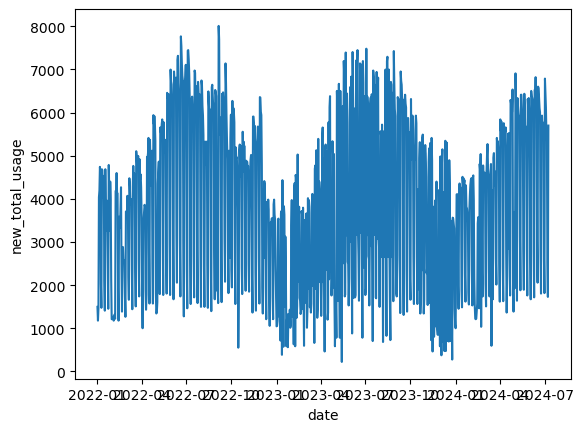

In [95]:
sns.lineplot(data=total_usage_df, x = 'date', y='new_total_usage')

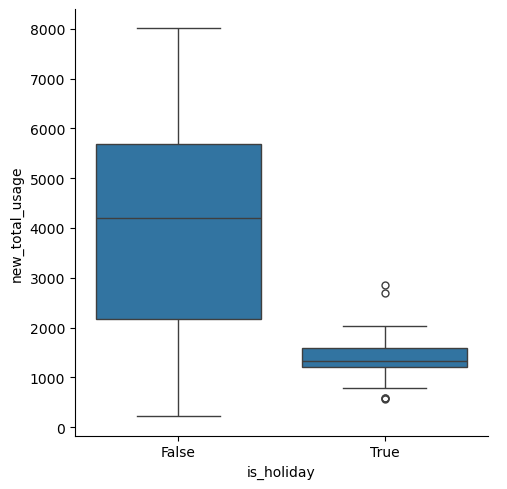

In [96]:
sns.catplot(data=total_usage_df, x='is_holiday', y = 'new_total_usage', kind='box')

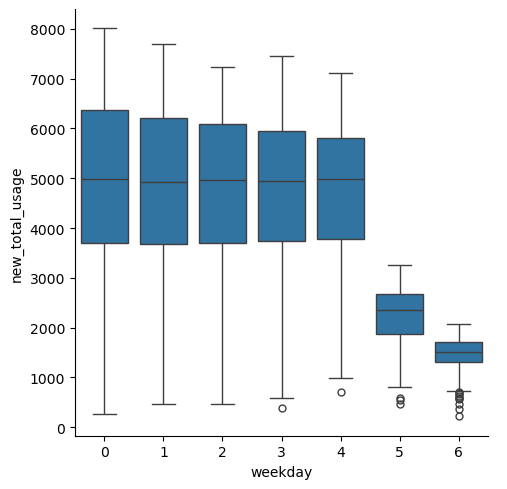

In [97]:
#boxplot
sns.catplot(data=total_usage_df, x='weekday', y = 'new_total_usage', kind='box')

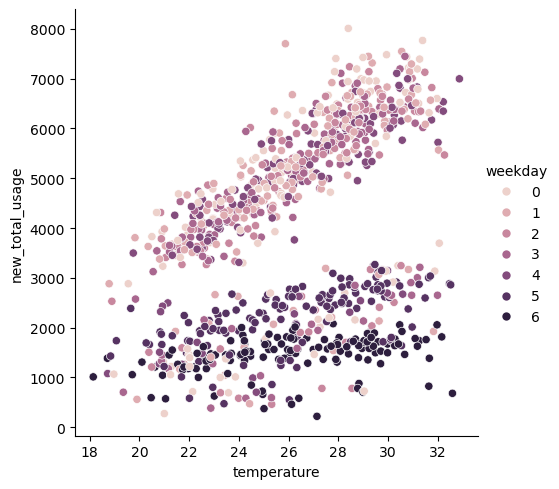

In [98]:
sns.relplot(data=total_usage_df,x='temperature', y='new_total_usage', hue='weekday' )

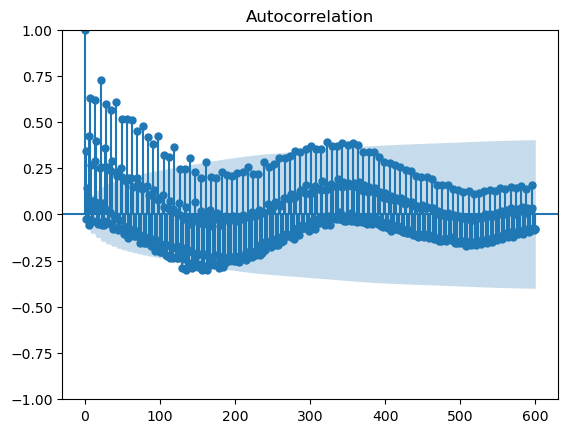

In [99]:
acf_plot = plot_acf(total_usage_df.new_total_usage, lags=600)

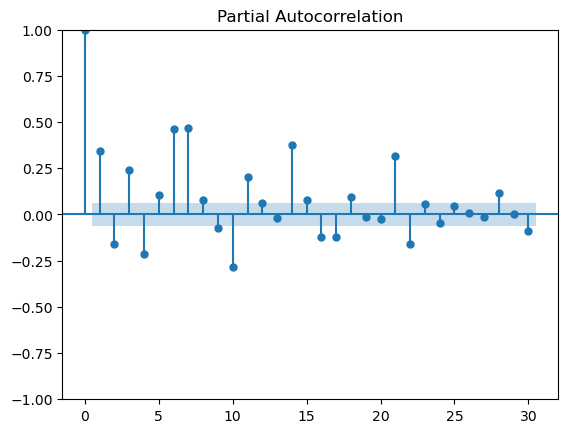

In [100]:
pacf_plot = plot_pacf(total_usage_df.new_total_usage)

##### Nhận xét
- Sản lượng có sự khác nhau giữa ngày lễ hoặc không: ngày lễ chỉ thuộc vào Q1 của không ngày lễ
- Có sự khác nhau rõ rệt về sản lượng giữa các ngày trong tuần và 2 ngày cuối tuần
- Đặc biệt, có sự tương quan thuận khá mạnh của sản lượng và nhiệt độ, vào những ngày trong tuần
- ACF có dấu hiệu dimishing 
- Theo PACF thì các lag: 6, 7, 14, 21 có mối tương quan khá tốt

#### CHUẨN BỊ DỮ LIỆU

In [101]:
total_usage_df.head()

,date,total_usage,is_holiday,temperature,weekday,fill_zeros_usage,new_total_usage
0,2022-01-01,1.36,True,21.89,5,1.36,1496.0
1,2022-01-02,1.07,False,21.96,6,1.07,1177.0
2,2022-01-03,1.33,True,21.99,0,1.33,1463.0
3,2022-01-04,3.67,False,22.57,1,3.67,4037.0
4,2022-01-05,3.81,False,22.97,2,3.81,4191.0


Xóa cột total_usage, fill_zeros_usage

In [102]:
ml_df = total_usage_df.drop(labels=['total_usage',  'fill_zeros_usage'], axis='columns')
ml_df = ml_df.set_index('date')
ml_df.head()

,is_holiday,temperature,weekday,new_total_usage
date,,,,
2022-01-01,True,21.89,5,1496.0
2022-01-02,False,21.96,6,1177.0
2022-01-03,True,21.99,0,1463.0
2022-01-04,False,22.57,1,4037.0
2022-01-05,False,22.97,2,4191.0


Encode dữ liệu thứ trong tuần

In [103]:
ml_df = pd.get_dummies(data=ml_df, columns=['weekday'])
ml_df.head()

,is_holiday,temperature,new_total_usage,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
date,,,,,,,,,,
2022-01-01,True,21.89,1496.0,False,False,False,False,False,True,False
2022-01-02,False,21.96,1177.0,False,False,False,False,False,False,True
2022-01-03,True,21.99,1463.0,True,False,False,False,False,False,False
2022-01-04,False,22.57,4037.0,False,True,False,False,False,False,False
2022-01-05,False,22.97,4191.0,False,False,True,False,False,False,False


In [104]:
split_date = pd.Timestamp('2024-01-01')

In [105]:
train_df = ml_df[ml_df.index < split_date]
test_df = ml_df[ml_df.index >= split_date]

In [106]:
X_train = train_df.drop(columns=['new_total_usage'])
X_test = test_df.drop(columns=['new_total_usage'])
y_train = train_df['new_total_usage']
y_test = test_df['new_total_usage']

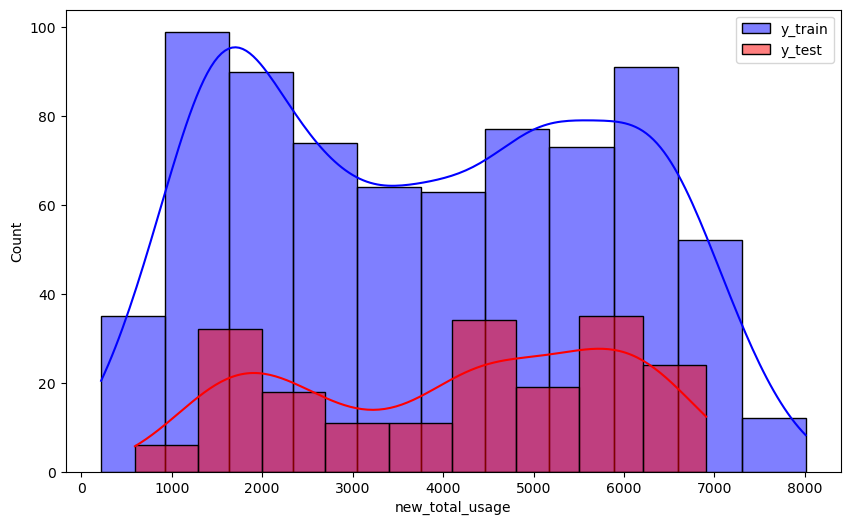

In [107]:
plt.figure(figsize=(10, 6))
sns.histplot(y_train, color="blue", label="y_train", kde=True)
sns.histplot(y_test, color="red", label="y_test", kde=True)
plt.legend()

##### Nhân xét: 
- Phân phối dữ liệu sản lượng trên tập train và test là khá tương đồng, có thể sử dụng để huấn luyện mô hình học máy

#### LƯU DATA VÀO FILE CSV

In [108]:
test_df.to_csv('test.csv')

In [109]:
train_df.to_csv('train.csv')

In [110]:
total_usage_df.to_csv('full_data.csv')